In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

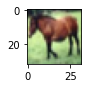

In [7]:
plt.figure(figsize=(1,1))
plt.imshow(train_images[7])
plt.show()

In [8]:
train_labels[7]

array([7], dtype=uint8)

In [9]:
# normalize
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 32)                98336     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs=3, batch_size=64)

Epoch 1/3
782/782 [==============================] - 7s 7ms/step - loss: 2.1443
Epoch 2/3
782/782 [==============================] - 3s 4ms/step - loss: 2.0329
Epoch 3/3
782/782 [==============================] - 3s 4ms/step - loss: 1.9981


In [12]:
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels,axis=1)

In [13]:
print(classification_report(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.27      0.14      0.18      1000
           1       0.28      0.49      0.36      1000
           2       0.00      0.00      0.00      1000
           3       0.18      0.13      0.15      1000
           4       0.25      0.11      0.16      1000
           5       0.00      0.00      0.00      1000
           6       0.25      0.68      0.37      1000
           7       0.21      0.36      0.26      1000
           8       0.31      0.43      0.36      1000
           9       0.19      0.13      0.15      1000

    accuracy                           0.25     10000
   macro avg       0.19      0.25      0.20     10000
weighted avg       0.19      0.25      0.20     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (4,4), input_shape=(32,32,3),activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(16, (2,2), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))

In [19]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
cnn_model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 38s 48ms/step - loss: 1.7046
Epoch 2/5
782/782 [==============================] - 38s 49ms/step - loss: 1.3987
Epoch 3/5
782/782 [==============================] - 40s 51ms/step - loss: 1.3045
Epoch 4/5
782/782 [==============================] - 38s 49ms/step - loss: 1.2359
Epoch 5/5
782/782 [==============================] - 39s 50ms/step - loss: 1.1829


In [20]:
predicted_labels = cnn_model.predict(test_images)
predicted_labels = np.argmax(predicted_labels,axis=1)

In [21]:
print(classification_report(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.58      0.66      0.62      1000
           1       0.69      0.74      0.71      1000
           2       0.53      0.35      0.42      1000
           3       0.48      0.39      0.43      1000
           4       0.44      0.65      0.53      1000
           5       0.56      0.47      0.51      1000
           6       0.69      0.69      0.69      1000
           7       0.70      0.62      0.66      1000
           8       0.61      0.74      0.67      1000
           9       0.69      0.64      0.66      1000

    accuracy                           0.59     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.60      0.59      0.59     10000

